# Classification model using Random Forest

### 1. Import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [31]:
path ='../../../Data_preprocessing/RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.979436,0.927694,0.847157,0.927951,0.954266,0.702499,0.924324,0.947513,0.977068,0.974450
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.942790,0.904091,0.916965,0.984643,0.951518,0.702499,0.985716,0.926652,0.977485,0.952089
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.899643,0.895334,0.962866,0.971061,0.941744,0.891154,0.966061,0.927933,0.938855,0.929364
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.930375,0.920000,0.906820,0.965345,0.989037,0.890711,0.953759,0.925267,0.984474,0.978449
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.909491,0.933381,0.970506,0.962001,0.965852,0.690264,0.961500,0.933123,0.962010,0.945552


In [32]:
X = data[['MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE', 'MSKCC_NA', 'MSKCC_POOR','AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']]
Y=[]
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

### 3. Train-Test dataset split

In [33]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


### 4. Select the parameters of the model and fit it

In [34]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [35]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=4,
                       n_estimators=10, random_state=125)

In [36]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.591304347826087


### 5. Prediction

In [37]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [38]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [39]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9478260869565217
Final accuracy on the testing dataset: 0.4827586206896552


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[65  1]
 [ 5 44]]
Input data:  [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 0 0]


In [41]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.98      0.90      0.94        49

    accuracy                           0.95       115
   macro avg       0.95      0.94      0.95       115
weighted avg       0.95      0.95      0.95       115



In [42]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[12  7]
 [ 8  2]]
Input data:  [1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0]
Prediction:        [0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]


In [43]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.22      0.20      0.21        10

    accuracy                           0.48        29
   macro avg       0.41      0.42      0.41        29
weighted avg       0.47      0.48      0.48        29



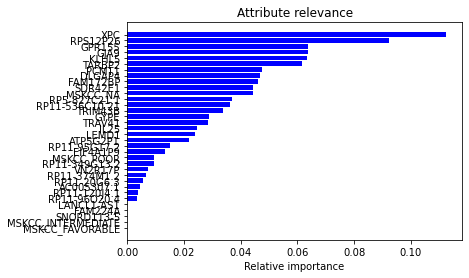

MSKCC_FAVORABLE = 0.0
MSKCC_INTERMEDIATE = 0.0
MSKCC_NA = 0.04428103276070337
MSKCC_POOR = 0.009488404223209023
AC005307.1 = 0.004686449699148857
ATP5G2P1 = 0.021676858468861263
DLGAP4 = 0.04684987694651886
EIF4A1P9 = 0.01346527230187165
FAM172BP = 0.04623629605379065
FAM224A = 0.0
GJA9 = 0.06362503683864291
GPR155 = 0.06388065614137359
GYPE = 0.028740534993147087
IL25 = 0.02472681964976297
KLHL5 = 0.0635396430970088
LANCL1-AS1 = 0.0
LEMD1 = 0.023862706850062462
PCMT1 = 0.04756150374996075
RP11-120J4.1 = 0.0036502329353960963
RP11-20G6.3 = 0.0056325020722369475
RP11-349G13.2 = 0.009421706370725128
RP11-374M1.2 = 0.006648432828687996
RP11-536C10.21 = 0.03637245818944385
RP11-95G17.2 = 0.015049562552508094
RP11-96O20.4 = 0.0036058648785117107
RP5-827C21.1 = 0.03699427259076736
RPS12P26 = 0.09214005397175139
SDR42E1 = 0.04435476220403532
SNORD113-5 = 0.0
TARBP2 = 0.06144484807332997
TRAV41 = 0.028384701898244984
TRIM43B = 0.0338855354107105
VN2R17P = 0.007418895338417145
XPC = 0.112375078

In [44]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.